<div class="alert alert-info">
Привет, Армен! Меня зовут Светлана Чих и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

<div class="alert alert-success">
<b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> Какие-то дополнительные материалы
</div>
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
 </div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')


<div class="alert alert-success">
<b>👍 Успех:</b> Импортированы нужные библиотеки, датасет загружен
</div>

**Общая информация о полученном датафрейме.**

In [57]:
# посмотрим первые 10 строк датасета
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [58]:
# получим сводную информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [59]:
# информация о размере таблицы
data.shape

(23699, 22)

In [60]:
# проверка на отсутствие явных дубликатов
data.duplicated().sum()

0

In [61]:
# подсчет пропусков в датасете
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Построим гистограмму для всех числовых столбцов таблицы на одном графике.**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

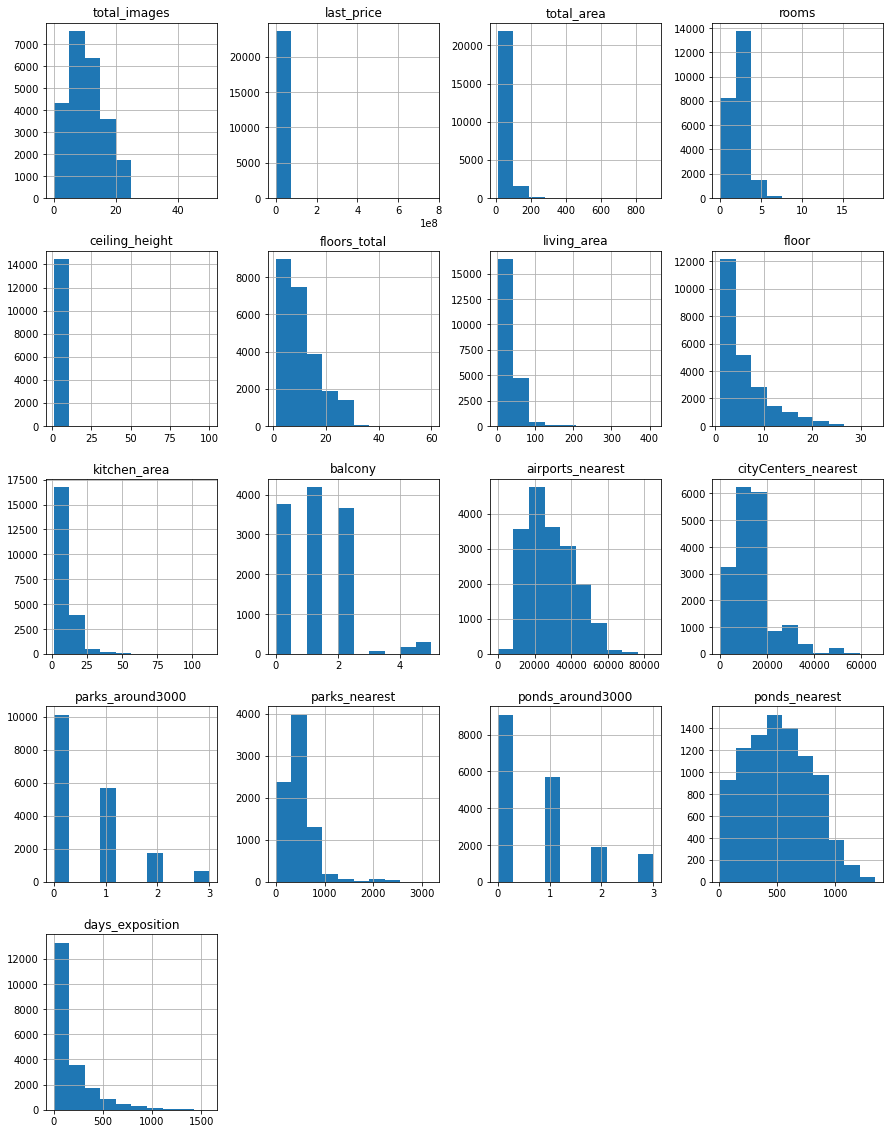

In [62]:
data.hist(figsize=(15, 20))

**Вывод:** 

Данных достаточно для дальнейшей работы.
1. Датафрейм вкючает в себя **22** столбца и **23698** строк. 


2. Явные дубликаты отсутствуют. 


3. Пропуски в датасете присутствуют в столбцах:
    - `ceiling_height`            
    - `floors_total`               
    - `living_area`               
    - `is_apartment`             
    - `kitchen_area`              
    - `balcony`                 
    - `locality_name`              
    - `airports_nearest`          
    - `cityCenters_nearest`       
    - `parks_around3000`          
    - `parks_nearest`            
    - `ponds_around3000`          
    - `ponds_nearest`            
    - `days_exposition`           
    
    Пропуски могут быть связаны с человеческим фактором, например, если продавец не указал число балконов, то,       скорее всего, в его квартире их нет или отсутствие апартаментов.
    Также, пропуски могут возникнуть по техническим причинам.


4. В названии столбцов есть не соответствие со стилем:
      - `cityCenters_nearest`  -> `city_centers_nearest`
      - `parks_around3000`     -> `parks_around_3000`
      - `ponds_around3000`     -> `ponds_around_3000`


5. С типами также есть не соответствия:
    - `first_day_exposition`
    - `is_apartment`        
    - `floors_total`         
    - `balcony`              
    - `parks_around3000`     
    - `ponds_around3000`     
    - `days_exposition`      
    
    
6. По некоторым графикам видно, что качество данных не достаточно точное. Например в гистограмме `rooms` не может начинаться с 0 или `ceiling_height` имеет максимальную высоту в 100 м.


7. Описание столбцов в датасете:
      - `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
      - `balcony` — число балконов;
      - `ceiling_height` — высота потолков (м);
      - `cityCenters_nearest` — расстояние до центра города (м);
      - `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
      - `first_day_exposition` — дата публикации;
      - `floor` — этаж;
      - `floors_total` — всего этажей в доме;
      - `is_apartment` — апартаменты (булев тип);
      - `kitchen_area` — площадь кухни в квадратных метрах (м²);
      - `last_price` — цена на момент снятия с публикации;
      - `living_area` — жилая площадь в квадратных метрах (м²);
      - `locality_name` — название населённого пункта;
      - `open_plan` — свободная планировка (булев тип);
      - `parks_around3000` — число парков в радиусе 3 км;
      - `parks_nearest` — расстояние до ближайшего парка (м);
      - `ponds_around3000` — число водоёмов в радиусе 3 км;
      - `ponds_nearest` — расстояние до ближайшего водоёма (м);
      - `rooms` — число комнат;
      - `studio` — квартира-студия (булев тип);
      - `total_area` — общая площадь квартиры в квадратных метрах (м²);
      - `total_images` — число фотографий квартиры в объявлении.
      

<div class="alert alert-success">
<b>👍 Успех:</b> Датасет просмотрен! Молодец, что подробно описал данные
</div>

### Выполните предобработку данных

**Приведем названия столбцов к нормальному виду и преобразуем столбец с форматом даты**

In [63]:
# Приведем к нормальному виду названия столбцов
data = data.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest',
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000'
    }
)

In [64]:
# преобразовали в тип дата
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Замена пропусков и преобразование типов данных**

В таблице `is_apartment` - выявлено **20924** пропусков. Скорее всего такое большое число пропусков       образовалось по техническим причинам. Данные в столбце описаны в виде **False** и **True**, то сделаем вывод, что при **True** - апартаменты присутствуют, а при **False** -    апартаменты отсутствуют. Дополнительной информации нет, значит возьмем пропуски за **False**.
     

In [65]:
# Тип столбца определили как булевый. Значит если True - апартамент иеется, а если False - апартамент отсутствует.
# Заполним пропущенные ячейки занчениями False. Переведем в тип bool. 
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype('bool')

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

В таблице `floors_total` - найдено **86** пропусков. В данном случае пропусков мало, значит это могло произойти по причине человеческого фактора. Пропуски запонили 0. 
   
   Таблица `days_exposition` имеет **3181** пропусков. Она показывает сколько дней было размещено объявление. Такое количество пропусков может быть по причине технического фактора, заполним пропуски нулевыми значениями. 

   В таблицах `parks_around_3000` и `ponds_around_3000` найдено по **5518** пропусков. Данные показывают число водоемов и парков в радиусе 3 км. Данные определены  по картографическим показателям. Будем считать, что рядом с жилыми объектами нет парков и водоемов в радиусе 3 км, значит заполним пропуски нулевым значением.
   
   В таблице `balcony` найдено **11519** пропусков. Будем считать пропуск за отсутствие балкона и заполним его нулевым значением.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> В доме может быть 0 этажей? Пропуски в days_exposition означают, что объявление активно. Данные по паркам и водоемам заполнять не нужно, заполнение 0 некорректно</s>
</div>

In [11]:
# Заменим пропуски на нулевые значения и переопределим типы  
#data['floors_total'] = data['floors_total'].fillna(0).astype('int')
#data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
#data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype('int')
#data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype('int')
#data['balcony'] = data['balcony'].fillna(0).astype('int')

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
Закоментировал прошлый код, чтобы не запутаться! 
    В таблице floors_total - найдено 86 пропусков. В данном случае пропусков мало, значит это могло произойти по причине человеческого фактора. Пропуски запонили значениями из таблицы floor. 
</div>


In [66]:
data['floors_total'] = data['floors_total'].fillna(data['floor']).astype('int')
data['balcony'] = data['balcony'].fillna(0).astype('int')


In [67]:
data['days_exposition'] = data['days_exposition'].astype('int', errors='ignore')
data['parks_around_3000'] = data['parks_around_3000'].astype('int', errors='ignore')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int', errors='ignore')


Таблица `ceiling_height` имеет **9195** пропусков. Заполним пропуски медианным значением. Такое количество пропусков может быть по причине технического фактора.
  
  В таблицах `living_area` - **1903**  пропусков и `kitchen_area` - **2278** пропусков, которые обозначают жилую площадь и площадь кухни заполним медианным значением. В данном случае скорей всего пропуски могли образоваться по техническим фактором. 

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Пропуски в жилой площади и площади кухни нельзя заполнять медианным значением, у нас слишком разные данные, в квартире разное количество комнат. Здесь можно посчитать коэффициент отношения жилой площади к общей и заполнить пропуски с помощью этого коэффициента. В некоторых квартирах может не быть кухни, поэтому и площади кухни нет</s>
</div>

In [14]:
# Пропуски можно заменить медианным значением
#data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
#data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].median()
#data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    Жилая площадь и площадь кухни  зависит от общей площади. Заполнил пропуски значениями от общей площади. 
</div>

In [68]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [69]:
data.loc[:, ['living_area', 'kitchen_area']].describe()

,living_area,kitchen_area
count,21796.000000,21421.000000
mean,34.457852,10.569807
std,22.030445,5.905438
min,2.000000,1.300000
25%,18.600000,7.000000
50%,30.000000,9.100000
75%,42.300000,12.000000
max,409.700000,112.000000


In [70]:
print('Доля жилой площади к общей площади: {:.0%}'.format((data['living_area'] / data['total_area']).median()))
print('Доля площади кухни к общей площади: {:.0%}'.format((data['kitchen_area'] / data['total_area']).median()))

Доля жилой площади к общей площади: 57%
Доля площади кухни к общей площади: 17%


In [71]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * 0.57)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * 0.17)

In [19]:
#data['living_area'].isna().sum()
#data['kitchen_area'].isna().sum()

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

Таблицы `airports_nearest` - **5542**, `city_сenters_nearest` - **5519**, `parks_nearest` - **15620**, `ponds_nearest` - **14589** имеют пропуски. Эти данные характеризующие расстояния до ближайшего аэропорта, центра города, парка и водоема имеют достаточно большие пропуски. Эти данные получены автоматически на основе картографических данных. Скорее всего эти данные не будут существенно влиять на цену недвижемости. Заполним пропуски нулевыми значениями.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Эти пропуски заполнять не нужно, заполнение 0 исказит данные, то есть кваритры будут находиться в аэропортах, в центре города (ведь расстояние до него 0), в парках и водоемах</s>
</div>

In [20]:
# Избавимся от пропусков в данных которые определяют дистанцию до аэропорта, центра города, парка и водоема
#columns_nearest = ['airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest']
#data[columns_nearest] = data[columns_nearest].fillna(0.0)

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    Столбцы которые получают данные автоматически с сервисов не заполняем!
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

В таблице `locality_name` до обработки было **365** уникальных значений, но эти данные имели неявные дубликаты. Одни и теже локации назывались по разному. После обработки и отсечения неявных дубликатов осталось **322** уникальных значений. Создал таблицу с уникальными названиями локаций и поместил новые данные в `locality_name_replace`.

In [21]:
# В имеющиеся пропуски вставим значение 'неизвестный' и переведем данные в нижний регистр
#data['locality_name'] = data['locality_name'].fillna('неизвестный')
#data['locality_name'] = data['locality_name'].str.lower()

# Устраним пропуски в таблице locality_name и избавимся от неявных дубликатов
# data['locality_name_replace'] = (
#     data['locality_name']
#     .str.replace('ё', 'е')
#     .replace(['поселок городского типа', 'городской поселок', 'поселок станции','поселок при железнодорожной станции', 'коттеджный поселок'], 'поселок', regex=True)
# )

# data['locality_name'].nunique() - data['locality_name_replace'].nunique()

In [22]:
# for location in data['locality_name'].unique():
#     print(location)

In [72]:
data['locality_name'] = data['locality_name'].str.lower()

# Устраним пропуски в таблице locality_name и избавимся от неявных дубликатов
data['locality_name_replace'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок', 'поселок станции','поселок при железнодорожной станции', 'коттеджный поселок'], 'поселок', regex=True)
    .replace(['садоводческое некоммерческое товарищество'], 'садоводческое товарищество', regex=True)
)


<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Зачем нам даные, где населенный пункт неизвестен? Сколько таких данных?</s>
</div>

In [73]:
print('Количество уникальных локаций стало:', len(data['locality_name_replace'].unique()))

Количество уникальных локаций стало: 319


In [74]:
data.dropna(subset=['locality_name_replace'], inplace=True)

In [75]:
data['locality_name_replace'].isna().sum()

0

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    Убрал параметр "неизвестен". Пропусков всего 49.
</div>

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Эти данные лучше удалить, строки без населенного пункта нам не нужны, их количество менее 1%
</div>

In [76]:
# проверка датасета
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_name_replace
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,санкт-петербург
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок шушары
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,санкт-петербург
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.63,9,False,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,санкт-петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,санкт-петербург


In [77]:
data.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest          5534
city_centers_nearest      5511
parks_around_3000         5510
parks_nearest            15586
ponds_around_3000         5510
ponds_nearest            14565
days_exposition           3180
locality_name_replace        0
dtype: int64

**Обработка аномальных данных**

**ceiling_height:**

In [29]:
# Поиск аномальных значений в ceiling_height
# print(sorted(data['ceiling_height'].unique()))
# print(len(data['ceiling_height'].unique()))
# print(data['ceiling_height'].describe())

# print()

# # построим диаграмму размаха для числа комнат
# data.boxplot('ceiling_height')
# plt.ylabel('высота потолков')
# plt.ylim(1.5, 110)
# plt.show()

In [30]:
# Устраним из таблицы строки с аномальными значениями
# Рассмотрим таблицу ceiling_height, медианая высота потолка составляет 2.65
# 2 все что ниже - это подвальные помещения
# 7 все что выше - это не соответствует диапазону высоты

# data = data.query('2 < ceiling_height < 7')

# print('Количество уникальных значений:', len(data['ceiling_height'].unique()))
# print(data['ceiling_height'].describe())

# data.boxplot('ceiling_height', figsize=(9,7))
# plt.ylabel('высота потолков')
# plt.ylim(1.5, 7)
# plt.show()


<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Ошибочные данные можно исправить, а не удалять. Графики должны быть оформлены, у них должен быть заголовок, подписи осей и при необходимости легенда. Оформить графики нужно по всей работе</s>
</div>

In [78]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.724311,10.673784,34.577306,5.893277,10.474956,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,0.989255,6.593455,22.355180,4.883317,6.017172,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


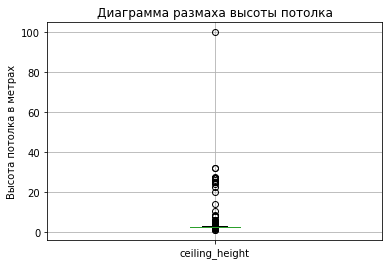

In [79]:
# диаграмма размаха для высоты потолка
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха высоты потолка')
plt.ylabel('Высота потолка в метрах')
plt.show()

In [80]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height']/10
print(sorted(data['ceiling_height'].unique().round(1)))

[1.0, 1.0, 1.2, 1.4, 1.8, 2.0, 2.2, 2.2, 2.3, 2.3, 2.3, 2.4, 2.4, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.7, 3.7, 3.7, 3.7, 3.7, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9, 3.9, 3.9, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.4, 4.4, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 10.0]


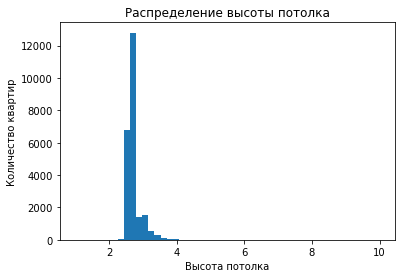

In [81]:
data['ceiling_height'].plot(bins=50, title='ceiling_height', kind='hist')
plt.title('Распределение высоты потолка')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

In [82]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.697695
std          0.237603
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

 Будем считать, что диапазон высоты потолка начинается от 2.4 метра до 4.2 метра

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    Замечание выполнено!
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента V2:</b> 
    Заменим минимальное значения потолков равное 1м на медиану.
</div>

In [83]:
median_ceiling_height = data['ceiling_height'].median()
data.loc[data['ceiling_height'] < 2.0, 'ceiling_height'] = median_ceiling_height


<div class="alert alert-danger">
<b>😔 Необходимо исправить V2:</b> Я вижу, что обработаны большие значения, но минимальное значение потолкв по прежнему 1 м, стоит заменить эти данные на медиану
</div>

**rooms:**

In [36]:
# Поиск аномальных значений в rooms
# print(sorted(data['rooms'].unique()))
# print(len(data['rooms'].unique()))
# print(data['rooms'].describe())

# print()

# # построим диаграмму размаха для числа комнат
# data.boxplot('rooms')
# plt.ylabel('число комнат')
# plt.ylim(0, 20)
# plt.show()

In [37]:
# Устраним аномальное значение rooms
# data = data.query('rooms != 0 & rooms < 7')

# print('Количество уникальных значений:', len(data['rooms'].unique()))
# print(data['rooms'].describe())
# print()

# # построим диаграмму размаха для числа комнат
# data.boxplot('rooms')
# plt.ylabel('число комнат')
# plt.ylim(0.5, 10)
# plt.show()


<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> При продаже комнат в коммунальных квартирах или общежитиях обычно указывают много комнат в кваритре</s>
</div>

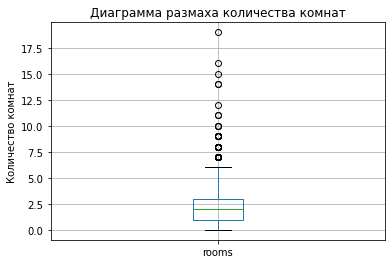

In [87]:
# диаграмма размаха для количества комнат
data.boxplot(column='rooms')
plt.title('Диаграмма размаха количества комнат')
plt.ylabel('Количество комнат')
plt.show()

In [88]:
sorted(data['rooms'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]

Возьмем максимальное значение по правому усу диаграммы равной 6 комнатам. Больше 6 комнат может быть в комунальных квартирах или общежитиях. Комнаты равные 0, будем считать студию.

In [89]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    Оставил данные без изменения!
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**floors_total:**

In [41]:
#проверим значения в столбце floors_total
#sorted(data['floors_total'].unique())

# print(sorted(data['floors_total'].unique()))
# print(len(data['floors_total'].unique()))
# print(data['floors_total'].describe())

# print()

# data.boxplot('floors_total')
# plt.ylabel('количество этажей')
# plt.ylim(0, 70)
# plt.show()


В таблице несколько аномально больших значений. По отсортированным уникальным данным предположим, что здания больше 36 этажей - является аномалией. Так же 0 - тоже является аномальным значением.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> В Санкт-Петербурге есть здания высотой 60 этажей, не нужно их удалять</s>
</div>

In [42]:
# # Так как всего 2 строки содержат аномальные значения, избавимся от них.
# data = data.query('floors_total != 0  & floors_total < 37')

# print('Количество уникальных значений:', len(data['floors_total'].unique()))
# print(data['floors_total'].describe())

# # построим диаграмму размаха для количества этажей в доме
# data.boxplot('floors_total')
# plt.ylabel('количество этажей')
# plt.ylim(1, 37)
# plt.show()

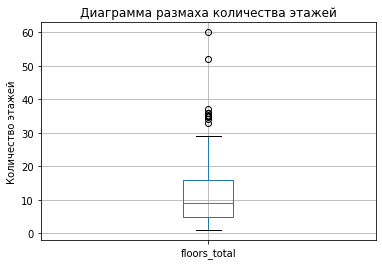

In [90]:
# диаграмма размаха для количества этажей
data.boxplot(column='floors_total')
plt.title('Диаграмма размаха количества этажей')
plt.ylabel('Количество этажей')
plt.show()

In [91]:
print(sorted(data['floors_total'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 52, 60]


Самое высокое жилое здание в Санкт-Петербурге: жилой комплекс "Князь Александр Невский". Общая высота этажей 37 метров. По правому усу диаграммы размаха максимум составляет примерно 29 метров.

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    Учел, что в Санкт-Петербурге есть здания высотой в 60 этажей.
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**balcony:**

In [45]:
# проверим значения в столбце balcony

# print(sorted(data['balcony'].unique()))
# print(len(data['balcony'].unique()))
# print(data['balcony'].describe())

# print()

# data.boxplot('balcony')
# plt.ylabel('количество балконов')
# plt.ylim(0, 8)
# plt.show()


In [46]:
# обработаем данные 
# data = data.query('balcony != 0')

# print('Количество уникальных значений:', len(data['balcony'].unique()))
# print(data['balcony'].describe())

# print()

# data.boxplot('balcony')
# plt.ylabel('количество балконов')
# plt.ylim(0, 6)
# plt.show()



<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Почему ты удалил кваритры без балконов? Сколько данных ты уже удалил? Нельзя проводить удаление не посчитав, какой процент данных теряется. Допустимо удалить не более 10% от датасета (всего). Твой анализ ниже недостоверен, данные очень сильно искажены, поэтому проверить работу я не смогу. Сразу отмечу, что стоит исправить цену за квадратный метр, сейчас не понятно в каких она единицах (принято писать ее в тыс. рублей). Корреляцию Пирсона в работе использовать не нужно, не по всем даных ее можно считать, а даже если можно, то она показывает только линейную зависимость.</s>
</div>

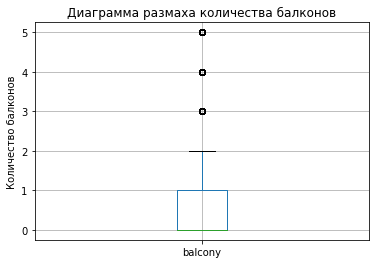

In [92]:
# диаграмма размаха для количества этажей
data.boxplot(column='balcony')
plt.title('Диаграмма размаха количества балконов')
plt.ylabel('Количество балконов')
plt.show()

In [93]:
print(sorted(data['balcony'].unique()))

[0, 1, 2, 3, 4, 5]


Балконы могут отсутствовать, Нулевое значение считаем корректным. По правому усу количество ровняется 2. Более двух - это уже редкость либо это может быть лоджия.

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    Устранил замечание!
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**last_price:**

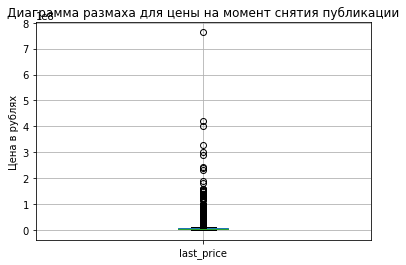

In [94]:
#построим диаграмму размаха для цены на момент снятия публикации
data.boxplot(column='last_price')
plt.title('Диаграмма размаха для цены на момент снятия публикации')
plt.ylabel('Цена в рублях')
plt.show()

In [95]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [96]:
print(sorted(data['last_price'].unique()))

# преобразуем цену в удобочитаемы вид
#data['last_price'] = data['last_price']/1000000

[12190.0, 430000.0, 440000.0, 450000.0, 470000.0, 480000.0, 490000.0, 500000.0, 520000.0, 530000.0, 550000.0, 560000.0, 565000.0, 580000.0, 585000.0, 590000.0, 600000.0, 620000.0, 630000.0, 650000.0, 660000.0, 680000.0, 690000.0, 700000.0, 710000.0, 720000.0, 730000.0, 740000.0, 750000.0, 760000.0, 770000.0, 777000.0, 780000.0, 790000.0, 799000.0, 800000.0, 820000.0, 850000.0, 860000.0, 869000.0, 870000.0, 880000.0, 890000.0, 900000.0, 910000.0, 920000.0, 945750.0, 950000.0, 965780.0, 970000.0, 980000.0, 990000.0, 995000.0, 999000.0, 999999.0, 1000000.0, 1010000.0, 1020000.0, 1030000.0, 1050000.0, 1060000.0, 1070000.0, 1080000.0, 1090000.0, 1099000.0, 1100000.0, 1110000.0, 1130000.0, 1150000.0, 1170000.0, 1180000.0, 1190000.0, 1199000.0, 1200000.0, 1220000.0, 1230000.0, 1240000.0, 1249000.0, 1250000.0, 1260000.0, 1270000.0, 1280000.0, 1290000.0, 1300000.0, 1310000.0, 1315000.0, 1320000.0, 1330000.0, 1350000.0, 1353000.0, 1360000.0, 1370000.0, 1380000.0, 1390000.0, 1399000.0, 1400000.0,

In [52]:
 #data['last_price'].describe()

**Проверим данные повторно.**

In [97]:
data.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest          5534
city_centers_nearest      5511
parks_around_3000         5510
parks_nearest            15586
ponds_around_3000         5510
ponds_nearest            14565
days_exposition           3180
locality_name_replace        0
dtype: int64

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23650 non-null  int64         
 1   last_price             23650 non-null  float64       
 2   total_area             23650 non-null  float64       
 3   first_day_exposition   23650 non-null  datetime64[ns]
 4   rooms                  23650 non-null  int64         
 5   ceiling_height         23650 non-null  float64       
 6   floors_total           23650 non-null  int64         
 7   living_area            23650 non-null  float64       
 8   floor                  23650 non-null  int64         
 9   is_apartment           23650 non-null  bool          
 10  studio                 23650 non-null  bool          
 11  open_plan              23650 non-null  bool          
 12  kitchen_area           23650 non-null  float64       
 13  b

In [99]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_name_replace
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,санкт-петербург
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок шушары
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,санкт-петербург
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.63,9,False,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,санкт-петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,санкт-петербург


**Вывод:**


1. В данном датасете было найдено большое число пропусков:
    - `ceiling_height`:            **9195**
    - `floors_total`:                **86**
    - `living_area`:               **1903**
    - `is_apartment`:             **20924**
    - `kitchen_area`:              **2278**
    - `balcony`:                  **11519**
    - `locality_name`:               **49**
    - `airports_nearest`:          **5542**
    - `cityCenters_nearest`:       **5519**
    - `parks_around3000`:          **5518**
    - `parks_nearest`:            **15620**
    - `ponds_around3000`:          **5518**
    - `ponds_nearest`:            **14589**
    - `days_exposition`:           **3181**

    Так как были найдены пропуски в числовых столбцах и строковых,  то возможно такое число пропусков было попричине человеческого фактора и технического факторов. Оператор мог не занести данные или пропустить ячейку или занести данные с ошибками и продолжить, забыв заполнить прошлые либо не было данных на момент внесения данных в таблицу. Еще пропуски могли образоваться по технологической причине. Например такие причины, как не корректно сохраненная таблица, сбой в базе данных, ошибка записи в базу, некорректно выгрузили данные с базы.
    
    `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` - похоже пропуски возникли по техническим причинам.
    


2. Рассмотрены типы данных в каждом столбце. Есть не соответствие типов и поэтому переопределим эти данные в правильные.

   - `first_day_exposition` объявлен как **object**, а должен быть **datetime**, так как данные являются датой.
   - `is_apartment` объявлен как  **object**, а должен быть **bool** потому, что значения True либо False. 
   - `floors_total` объявлен как **float64**, а должен быть **int** не может быть количество этажей вещественным значением.
   - `balcony` объявлен как **float64**, а должен быть **int** неможет быть количество балконов дробным числом.
   - `parks_around_3000` объявлен как **float64**, а должен быть **int** потому, что число парков не может быть дробным.
   - `ponds_around_3000`    объявлен как **float64**, а должен быть **int** потому, что число водоемов не может быть вещественным значением. 
   - `days_exposition` объявлен как **float64**, а должен быть **int**, так как дни не могут быть вещественным значением. 
    
    

3. Изучил уникальные значения и устранил неявные дубликаты.
   
   
   В таблице `locality_name` до обработки было **365** уникальных значений, но эти данные имели неявные дубликаты. Одни и теже локации назывались по разному. После обработки и отсечения неявных дубликатов осталось **319** уникальных значений. Создал таблицу с уникальными названиями локаций и поместил новые данные в `locality_name_replace`.
 
 
5. Аномальные значения выявлены:
    - `ceiling_height`
    - `rooms`
    - `floors_total`
    - `balcony`
    - `last_price`


<div class="alert alert-success">
<b>👍 Успех:</b> Даные обработаны и готовы к анализу!
</div>

### Добавьте в таблицу новые столбцы

**Цена одного квадратного метра**

In [56]:
# data.reset_index(drop=True, inplace=True)

In [100]:
data['price_one_sqr_meter'] = data['last_price'] / data['total_area']

In [101]:
# округлить до двух знаков после запятой
# data['price_one_sqr_meter'] = data['price_one_sqr_meter'].round(2)

In [102]:
print('Максимальная цена за квадратный метр:', data['price_one_sqr_meter'].max())
print('Минимальная цена за квадратный метр:', data['price_one_sqr_meter'].min())
print('Средняя цена за квадратный метр:', data['price_one_sqr_meter'].mean())
print('Медианная цена за квадратный метр:', data['price_one_sqr_meter'].median())

Максимальная цена за квадратный метр: 1907500.0
Минимальная цена за квадратный метр: 111.8348623853211
Средняя цена за квадратный метр: 99432.24715198229
Медианная цена за квадратный метр: 95000.0


In [103]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_name_replace,price_one_sqr_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,санкт-петербург,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок шушары,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,санкт-петербург,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.63,9,False,...,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,санкт-петербург,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,санкт-петербург,100000.000000


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**День недели, меяц и год публикации объявления**

День недели публикации объявления:
  
   - 0 -   понедельник
   - 1 -   вторник
   - 2 -   среда
   - 3 -   четверг
   - 4 -   пятница
   - 5 -   суббота
   - 6 -   воскресенье

In [104]:
data['day_week_publication_advertisement'] = data['first_day_exposition'].dt.weekday
data['month_publication_advertisement'] = data['first_day_exposition'].dt.month
data['year_publication_advertisement'] = data['first_day_exposition'].dt.year

In [105]:
data['year_publication_advertisement'].value_counts()

2018    8512
2017    8185
2019    2879
2016    2765
2015    1173
2014     136
Name: year_publication_advertisement, dtype: int64

Количество предложений на рынке было максимальным в 2017 и 2018 годах, а с 2019 года количество предложений
стало сокращаться и спустилось на уровень 2016 года.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**Тип этажа квартиры**

In [106]:
# Категоризируем тип этажа квартиры: значения — 'первый', 'последний', 'другой'
def categorize_floor_type(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'нет категории'

In [107]:
data['floor_type_category'] = data.apply(categorize_floor_type, axis=1)

In [108]:
data['floor_type_category'].value_counts()

другой       17326
последний     3412
первый        2912
Name: floor_type_category, dtype: int64

Судя по результату, самыми востребованными являются квартиры выше первого этажа до предпоследнего.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**Расстояние до центра города в километрах**

In [109]:
# переведите из м в км и округлите до ближайших целых значений
data['city_centers_nearest_km'] = data['city_centers_nearest'] // 1000
# data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round(2).astype('int')

In [110]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,locality_name_replace,price_one_sqr_meter,day_week_publication_advertisement,month_publication_advertisement,year_publication_advertisement,floor_type_category,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,NaN,санкт-петербург,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,NaN,81.0,поселок шушары,82920.792079,1,12,2018,первый,18.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,2.0,574.0,558.0,санкт-петербург,92785.714286,3,8,2015,другой,13.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.63,9,False,...,3.0,234.0,424.0,санкт-петербург,408176.100629,4,7,2015,другой,6.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121.0,санкт-петербург,100000.000000,1,6,2018,другой,8.0


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Проведите исследовательский анализ данных

**Изучить перечисленные ниже параметры объектов и построить отдельные гистограммы для каждого из этих параметров**

Список параметров которые изучим и опишем:
   - общая площадь;
   - жилая площадь;
   - площадь кухни;
   - цена объекта;
   - количество комнат;
   - высота потолков;
   - тип этажа квартиры («первый», «последний», «другой»);
   - общее количество этажей в доме;
   - расстояние до центра города в метрах;
   - расстояние до ближайшего парка

**total_area (общая площадь)**

In [111]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

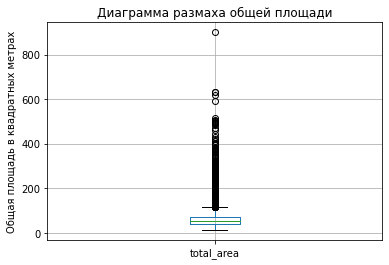

In [112]:
data.boxplot(column='total_area')
plt.title('Диаграмма размаха общей площади')
plt.ylabel('Общая площадь в квадратных метрах')
plt.show()

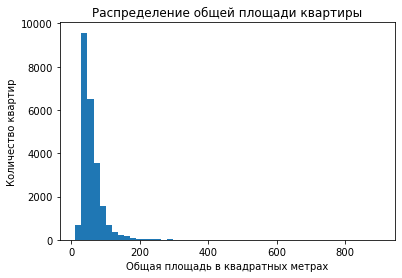

In [113]:
data['total_area'].plot(bins=50, kind='hist')
plt.xlabel('Общая площадь в квадратных метрах')
plt.ylabel('Количество квартир')
plt.title('Распределение общей площади квартиры')
plt.show()

In [114]:
data_total_area = data.query('total_area < 220')

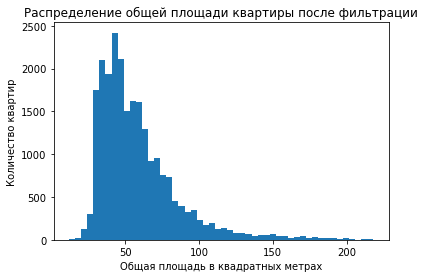

In [115]:
data_total_area['total_area'].plot(bins=50, kind='hist')
plt.xlabel('Общая площадь в квадратных метрах')
plt.ylabel('Количество квартир')
plt.title('Распределение общей площади квартиры после фильтрации')
plt.show()

In [116]:
data_total_area['total_area'].describe()

count    23469.000000
mean        58.450961
std         27.319394
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        218.000000
Name: total_area, dtype: float64

Медиана и среднее общей площади схожи, разбросов в данных не значительное количество. Общая площадь в Санкт-Петербурге исоседних населенных пунктах составляет примерно 58 кв.м.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**living_area (жилая площадь)**

In [117]:
data['living_area'].describe()

count    23650.000000
mean        34.577306
std         22.355180
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

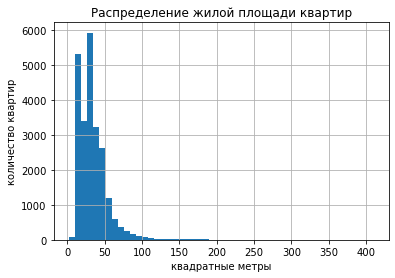

In [118]:
data['living_area'].plot(kind='hist', grid=True, bins=50)
plt.title('Распределение жилой площади квартир')
plt.xlabel('квадратные метры')
plt.ylabel('количество квартир')
plt.show()

Избавимся от разбросов:

In [119]:
data_living_area = data.query('living_area < 80')

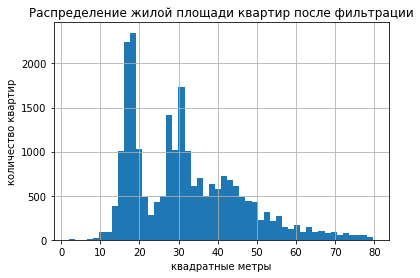

In [120]:
data_living_area['living_area'].plot(kind='hist', grid=True, bins=50)
plt.title('Распределение жилой площади квартир после фильтрации')
plt.xlabel('квадратные метры')
plt.ylabel('количество квартир')
plt.show()

In [121]:
data_living_area['living_area'].describe()

count    22854.000000
mean        31.699861
std         14.034382
min          2.000000
25%         18.714525
50%         30.000000
75%         40.942500
max         79.740000
Name: living_area, dtype: float64

Видим два пика: около 18 кв.м (скорей всего много студий в данных) и 31 кв.м. Медиана и среднее значение в общем схожи между собой. Разбросов в данных незначительное количество.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**kitchen_area (площадь кухни)**

In [122]:
data['kitchen_area'].describe()

count    23650.000000
mean        10.474956
std          6.017172
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

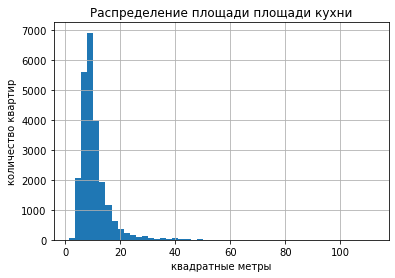

In [123]:
data['kitchen_area'].plot(kind='hist', grid=True, bins=50)
plt.title('Распределение площади площади кухни')
plt.xlabel('квадратные метры')
plt.ylabel('количество квартир')
plt.show()

Избавимся от разбросов:

In [124]:
data_kitchen_area = data.query('kitchen_area < 30')

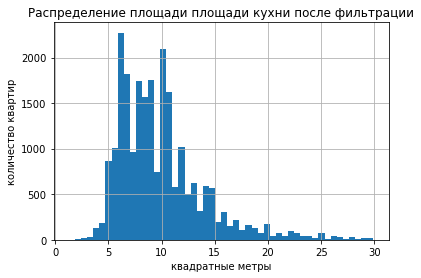

In [125]:
data_kitchen_area['kitchen_area'].plot(kind='hist', grid=True, bins=50)
plt.title('Распределение площади площади кухни после фильтрации')
plt.xlabel('квадратные метры')
plt.ylabel('количество квартир')
plt.show()

In [126]:
data_kitchen_area['kitchen_area'].describe()

count    23229.000000
mean         9.925377
std          4.117386
min          1.300000
25%          7.000000
50%          9.000000
75%         11.600000
max         29.900000
Name: kitchen_area, dtype: float64

Среднее значение площади кухни с медианным значением схожи. Разбросов в данных незначительное количество.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**last_price (цена объекта)**

In [127]:
print(data['last_price'].mean())
print(data['last_price'].median())

6541126.897928119
4650000.0


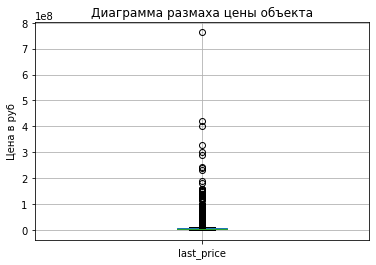

In [128]:
data.boxplot(column='last_price')
plt.title('Диаграмма размаха цены объекта')
plt.ylabel('Цена в руб')
plt.show()

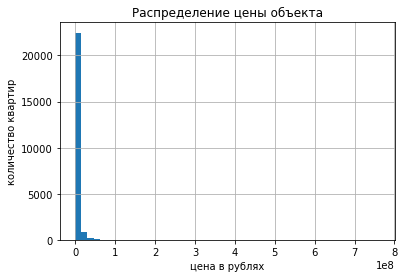

In [129]:
data['last_price'].plot(kind='hist', grid=True, bins=50)
plt.title('Распределение цены объекта')
plt.xlabel('цена в рублях')
plt.ylabel('количество квартир')
plt.show()

In [130]:
# Избавимся от разбросов
data_last_price = data.query('last_price < 20000000')

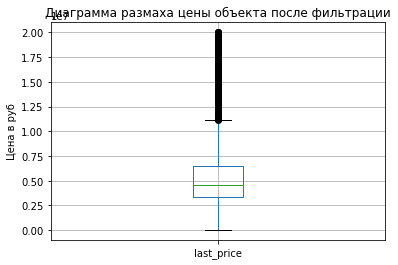

In [131]:
data_last_price.boxplot(column='last_price')
plt.title('Диаграмма размаха цены объекта после фильтрации')
plt.ylabel('Цена в руб')
plt.show()

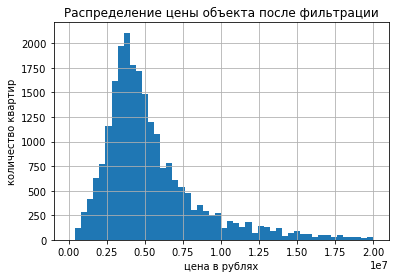

In [132]:
data_last_price['last_price'].plot(kind='hist', grid=True, bins=50)
plt.title('Распределение цены объекта после фильтрации')
plt.xlabel('цена в рублях')
plt.ylabel('количество квартир')
plt.show()

In [133]:
# Процент на сколько сократили данные
print('Сократили данные на {:.2f}%'.format(data.shape[0]/data_last_price['last_price'].shape[0]))

Сократили данные на 1.03%


In [134]:
print(data_last_price['last_price'].mean())
print(data_last_price['last_price'].median())

5411420.908408932
4550000.0


Изначально среднее значение и медианное цены различались примерно в 2 раза. Разбросов было значительное количество. Удалили 1% данных, чтобы разбросы пришли к нормальному виду. Средняя цена за квартиры составляет примерно 4.5 млн. рублей.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**rooms (количество комнат)**

In [135]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

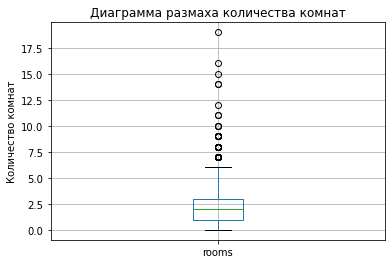

In [136]:
data.boxplot(column='rooms')
plt.title('Диаграмма размаха количества комнат')
plt.ylabel('Количество комнат')
plt.show()

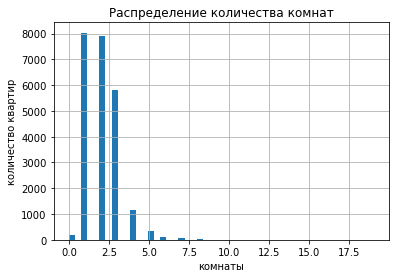

In [137]:
data['rooms'].plot(kind='hist', grid=True, bins=50)
plt.title('Распределение количества комнат')
plt.xlabel('комнаты')
plt.ylabel('количество квартир')
plt.show()

Чаще всего встречаются  квартиры с 1 и 2 комнатами.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**ceiling_height (высота потолков)**

In [138]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.697986
std          0.236668
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

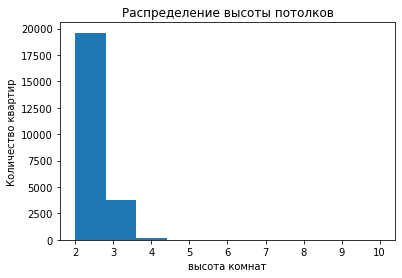

In [139]:
data['ceiling_height'].plot(bins=10, kind='hist')
plt.title('Распределение высоты потолков')
plt.xlabel('высота комнат')
plt.ylabel('Количество квартир')
plt.show()

Высота потолков в среднем 2.7 м, медиана 2.65 м. Также есть квартиры у которых потолки 3 м. Выше 3 м. встречаются очень редко.

<div class="alert alert-danger">
<b>😔 Необходимо исправить V2:</b> У тебя все еще остались потолки высотой 1 м
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    Устранил замечание!
</div>

**floor_type_category (тип этажа квартиры)**

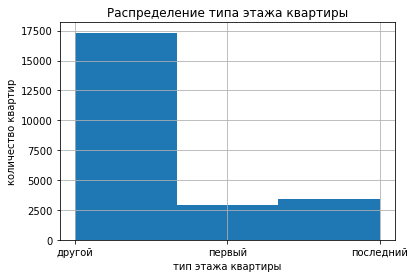

In [140]:
data['floor_type_category'].hist(bins=3)
plt.title('Распределение типа этажа квартиры')
plt.xlabel('тип этажа квартиры')
plt.ylabel('количество квартир')
plt.show()

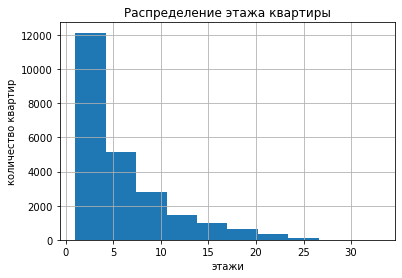

In [141]:
data['floor'].hist(bins=10)
plt.title('Распределение этажа квартиры')
plt.xlabel('этажи')
plt.ylabel('количество квартир')
plt.show()

Большинство квартир распологаются на первых 5 этажах. Количество квартир в категории "другой" больше чем "первый" и "последний". Квартир в категории "последний" больше чем в "первый". Скорей всего это зависит от того, что на первые этажи чаще распологаются магазины либо какие нибудь учереждения.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**floors_total (общее количество этажей в доме)**

In [142]:
data['floors_total'].describe()

count    23650.000000
mean        10.673784
std          6.593455
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

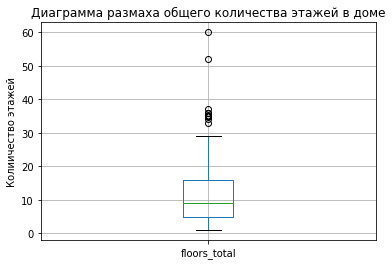

In [143]:
data.boxplot(column='floors_total')
plt.title('Диаграмма размаха общего количества этажей в доме')
plt.ylabel('Колиичество этажей')
plt.show()

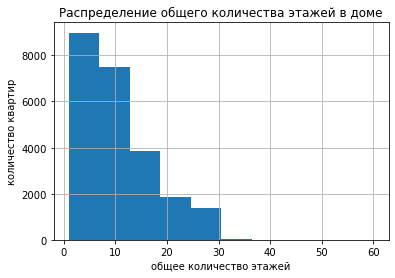

In [144]:
data['floors_total'].plot(kind='hist', grid=True, bins=10)
plt.title('Распределение общего количества этажей в доме')
plt.xlabel('общее количество этажей')
plt.ylabel('количество квартир')
plt.show()

In [145]:
print(data['floors_total'].mean())
print(data['floors_total'].median())

10.673784355179704
9.0


Чаще всего встречаются типы застроек 5 и 9 этажные дома.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**city_centers_nearest (расстояние до цунтра города)**

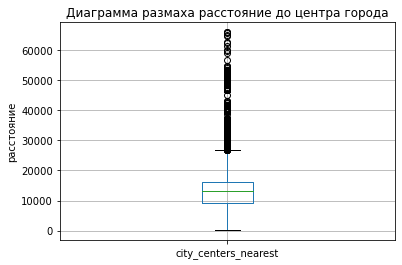

In [146]:
data.boxplot(column='city_centers_nearest')
plt.title('Диаграмма размаха расстояние до центра города')
plt.ylabel('расстояние')
plt.show()

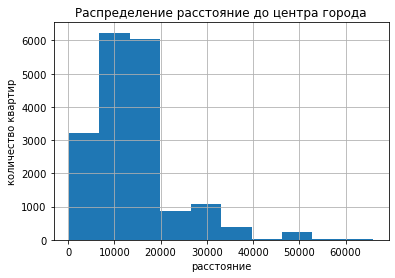

In [147]:
data['city_centers_nearest'].plot(kind='hist', grid=True, bins=10)
plt.title('Распределение расстояние до центра города')
plt.xlabel('расстояние')
plt.ylabel('количество квартир')
plt.show()

In [105]:
# Избавимся от разбросов
# data_city_center_neares = data.query('city_centers_nearest < 40000')

<div class="alert alert-danger">
<b>😔 Необходимо исправить V2:</b> Квартиры могут находиться и дальше 40 км от центра, эти данные не стоит удалять
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    Устранил замечание!
</div>

Больше всего квартир продается недалеко от центра, так какони пользуются спросом.

**parks_nearest (асстояние до блидайшего парка)**

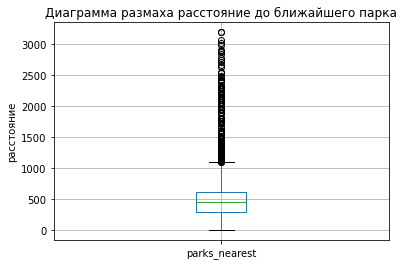

In [150]:
data.boxplot(column='parks_nearest')
plt.title('Диаграмма размаха расстояние до ближайшего парка')
plt.ylabel('расстояние')
plt.show()

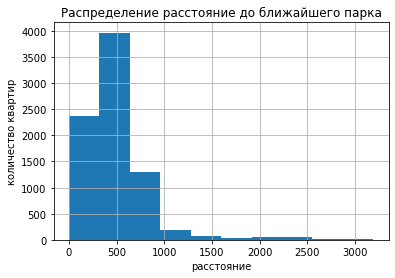

In [151]:
data['parks_nearest'].plot(kind='hist', grid=True, bins=10)
plt.title('Распределение расстояние до ближайшего парка')
plt.xlabel('расстояние')
plt.ylabel('количество квартир')
plt.show()

In [109]:
# Избавимся от разбросов
#data_park_neares = data.query('parks_nearest < 900')

<div class="alert alert-danger">
<b>😔 Необходимо исправить V2:</b> Удаление от парка тоже не является причиной для удаления данных
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    Устранил замечание!
</div>

Чаще всего квартиры находятся в 400 - 500 м от ближайшего парка.

**Как быстро продавались квартиры**

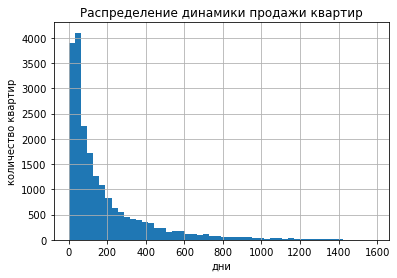

In [152]:
data['days_exposition'].plot(kind='hist', grid=True, bins=50)
plt.title('Распределение динамики продажи квартир')
plt.xlabel('дни')
plt.ylabel('количество квартир')
plt.show()

In [153]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Быстрыми продажами считаем те которые были совершены в течении одного дня после публикации объявления. Медиана и среднее размещение отличается в 2 раза. Наблюдается большой разброс данных. 

In [154]:
# проверим с наибольшим количеством дней в объявлении
data.query('days_exposition == 1580.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,locality_name_replace,price_one_sqr_meter,day_week_publication_advertisement,month_publication_advertisement,year_publication_advertisement,floor_type_category,city_centers_nearest_km
18843,11,3500000.0,48.2,2014-12-15,2,2.5,5,27.4,2,False,...,NaN,NaN,1580.0,деревня новое девяткино,72614.107884,0,12,2014,другой,NaN


Все данные выглядят реальными для строки **18843** за исключением количества дней размещения рекламы. Возможно продавец забыл убрать на сайте квартиру с продажи и скорее всего из-за этого среднее значение исказилось. Посмотрим диаграмму размаха.

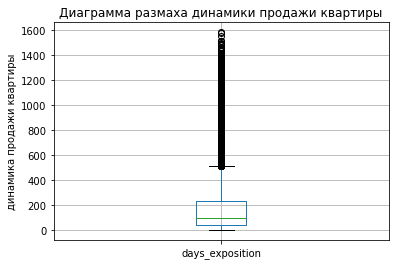

In [155]:
data.boxplot(column='days_exposition')
plt.title('Диаграмма размаха динамики продажи квартиры')
plt.ylabel('динамика продажи квартиры')
plt.show()

In [156]:
# возьмем значение до 500
data = data.query('days_exposition < 500')
print(data['days_exposition'].mean())
print(data['days_exposition'].median())


126.88905507184445
84.0


Разница между медианой и средним значением сократилось. Выглядит более реальным.

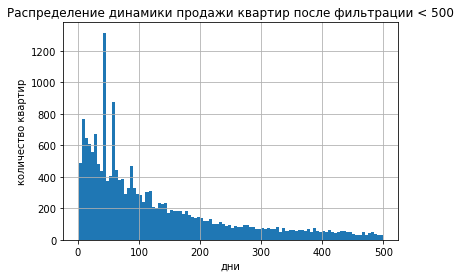

In [157]:
data['days_exposition'].plot(kind='hist', grid=True, bins=100)
plt.title('Распределение динамики продажи квартир после фильтрации < 500')
plt.xlabel('дни')
plt.ylabel('количество квартир')
plt.show()

Видны пики, но не понятны их происхождение. Посмотрим более подробно и уменьшим например до 100 дней.

In [158]:
data_days_exposition = data.query('days_exposition < 100')

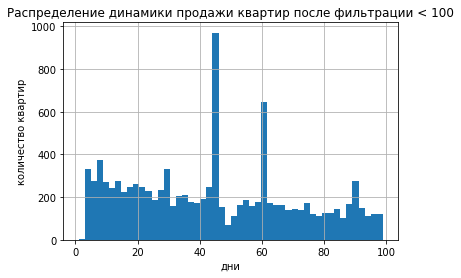

In [159]:
data_days_exposition['days_exposition'].plot(kind='hist', grid=True, bins=50)
plt.title('Распределение динамики продажи квартир после фильтрации < 100')
plt.xlabel('дни')
plt.ylabel('количество квартир')
plt.show()

In [160]:
data_days_exposition['days_exposition'].describe()

count    10490.000000
mean        44.691039
std         26.749919
min          1.000000
25%         21.000000
50%         45.000000
75%         63.000000
max         99.000000
Name: days_exposition, dtype: float64

 **Вывод:**
 
   -  Среднее время продажи 44 дней, а медиана 45 дней. 
   -  Пики наблюдаются на 45, 60 и 90 дней.
   -  Скорее всего это автоматическое закрытие объявления при условии например, что пользователь не продлил его.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! 45, 60 и 90 дней - дни когда объявления снимаются автоматически
</div>

**Определить факторы, которые больше всего влияют на общую (полную) стоимость объекта**

**Зависит ли цена от общей площади**

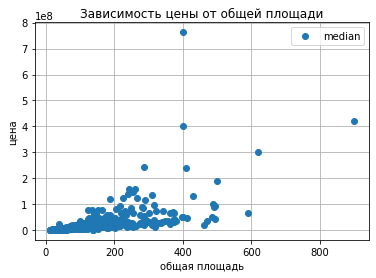

Коэффициент корреляции =  0.6271980656038634


In [120]:
price_total_area_pivot_table = data.pivot_table(index='total_area', values='last_price', aggfunc=['mean', 'median', 'count'])
price_total_area_pivot_table.columns = ['mean', 'median', 'count']

price_total_area_pivot_table.sort_values(by='median', ascending=False)
price_total_area_pivot_table.plot(y='median', style='o', grid=True)
plt.title('Зависимость цены от общей площади')
plt.xlabel('общая площадь')
plt.ylabel('цена')
plt.show()

print('Коэффициент корреляции = ', data['total_area'].corr(data['last_price']))


 - Стоимость объекта положительно зависит от общей площади (коэф. корр. 0.62)

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Корреляцию Пирсона в этом проекте использовать не нужно, мы не ищем линейную зависимость, достаточно диаграмм рассеяния. Не ко всем данным можно применять такой расчет корреляции. Выводы здесь стоит делать только на основе визуализации
</div>

**Зависит ли цена от жилой площади**

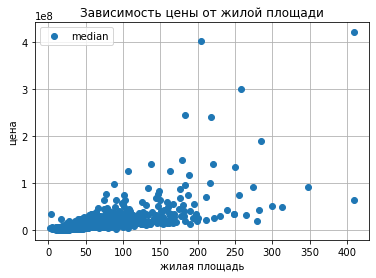

Коэффициент корреляции =  0.5581446847045279


In [161]:
living_total_area_pivot_table = data.pivot_table(index='living_area', values='last_price', aggfunc=['mean', 'median', 'count'])
living_total_area_pivot_table.columns = ['mean', 'median', 'count']

living_total_area_pivot_table.sort_values(by='median', ascending=False)
living_total_area_pivot_table.plot(y='median', style='o', grid=True)

plt.title('Зависимость цены от жилой площади')
plt.xlabel('жилая площадь')
plt.ylabel('цена')
plt.show()


print('Коэффициент корреляции = ', data['living_area'].corr(data['last_price']))


   -  Стоимость объекта положительно зависит от жилой площади (коэф. корр. 0.55), но меньше, чем от общей площади.

**Зависит ли цена от площади кухни**

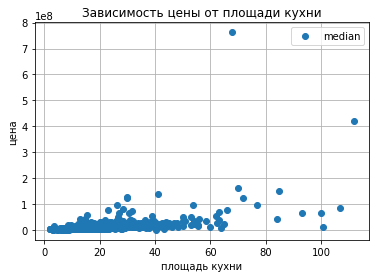

Коэффициент корреляции =  0.47909547780731204


In [162]:
kitchen_total_area_pivot_table = data.pivot_table(index='kitchen_area', values='last_price', aggfunc=['mean', 'median', 'count'])
kitchen_total_area_pivot_table.columns = ['mean', 'median', 'count']

kitchen_total_area_pivot_table.sort_values(by='median', ascending=False)
kitchen_total_area_pivot_table.plot(y='median', style='o', grid=True)

plt.title('Зависимость цены от площади кухни')
plt.xlabel('площадь кухни')
plt.ylabel('цена')
plt.show()

print('Коэффициент корреляции = ', data['kitchen_area'].corr(data['last_price']))


-  Стоимость объекта положительно зависит от площади кухни (коэф. корр. 0.47), но слабее чем от общей площади или от жилой площади.

**Зависит ли цена от количества комнат**

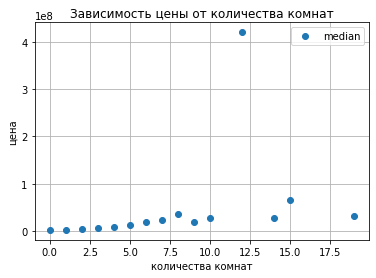

Коэффициент корреляции =  0.3416063382078745


In [163]:
rooms_total_area_pivot_table = data.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'median', 'count'])
rooms_total_area_pivot_table.columns = ['mean', 'median', 'count']

rooms_total_area_pivot_table.sort_values(by='median', ascending=False)
rooms_total_area_pivot_table.plot(y='median', style='o', grid=True)

plt.title('Зависимость цены от количества комнат')
plt.xlabel('количества комнат')
plt.ylabel('цена')
plt.show()

print('Коэффициент корреляции = ', data['rooms'].corr(data['last_price']))


  - Стоимость объекта положительно зависит от количесва комнат (коэф. корр. 0.34), но слабо.

**Зависит ли цена от этажа на котором расположена квартира**

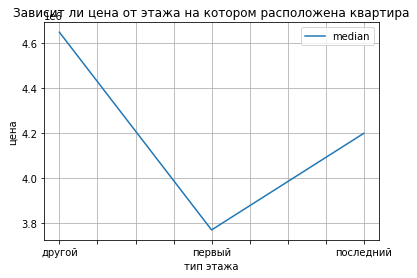

In [164]:
floor_type_total_area_pivot_table = \
    data.pivot_table(index='floor_type_category', values='last_price', aggfunc=['mean', 'median', 'count'])
floor_type_total_area_pivot_table.columns = ['mean', 'median', 'count']

floor_type_total_area_pivot_table.sort_values(by='median', ascending=False)
floor_type_total_area_pivot_table.plot(y='median', grid=True)

plt.title('Зависит ли цена от этажа на котором расположена квартира')
plt.xlabel('тип этажа')
plt.ylabel('цена')
plt.show()


  - Коффициент корреляции нельзя получит, так как в столбце не числовые значения.
  - Квартиры которые находятся со 2-го до предпоследнего являются самыми дорогими, квартиры на последнем этаже дешевле, но дороже, чем на первом.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**Зависит ли цена от даты размещения**

 День недели публикации объявления:
  
   - 0 -   понедельник
   - 1 -   вторник
   - 2 -   среда
   - 3 -   четверг
   - 4 -   пятница
   - 5 -   суббота
   - 6 -   воскресенье
   

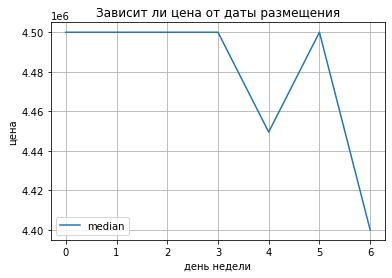

In [165]:
day_week_total_area_pivot_table = data.pivot_table(index='day_week_publication_advertisement', values='last_price', aggfunc=['mean', 'median', 'count'])
day_week_total_area_pivot_table.columns = ['mean', 'median', 'count']

day_week_total_area_pivot_table.sort_values(by='median', ascending=False)
day_week_total_area_pivot_table.plot(y='median', grid=True)
plt.title('Зависит ли цена от даты размещения')
plt.xlabel('день недели')
plt.ylabel('цена')
plt.show()



 - Наименьшее число объявлений размещено в выходные дни.
 - Самые низкие медианные значения выпало на выходные дни.

,mean,median,count
month_publication_advertisement,,,
1,5.796617e+06,4499999.0,1169
2,6.005857e+06,4500000.0,2123
3,5.716548e+06,4400000.0,1757
4,6.570948e+06,4500000.0,1373
5,6.219396e+06,4450000.0,1005
6,5.981640e+06,4300000.0,1510
7,6.288003e+06,4500000.0,1457
8,5.757164e+06,4500000.0,1510
9,6.549644e+06,4594500.0,1716


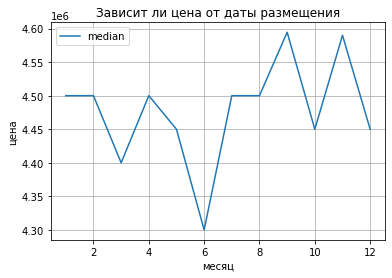

In [166]:
# месяц
month_total_area_pivot_table = data.pivot_table(index='month_publication_advertisement', values='last_price', aggfunc=['mean', 'median', 'count'])
month_total_area_pivot_table.columns = ['mean', 'median', 'count']

month_total_area_pivot_table.sort_values(by='median', ascending=False)
month_total_area_pivot_table.plot(y='median', grid=True)
plt.title('Зависит ли цена от даты размещения')
plt.xlabel('месяц')
plt.ylabel('цена')


display(month_total_area_pivot_table)

 - Наименьшее число объявлений по месяцам в мае и июне.
 - Спрос существует на квартиры в апреле, сентябре и ноябре.
 - Спады зависят скорее всего от праздников и отпусков.

,mean,median,count
year_publication_advertisement,,,
2015,7.091866e+06,4750000.0,443
2016,6.489312e+06,4490000.0,2071
2017,6.351551e+06,4450000.0,7570
2018,5.611383e+06,4490000.0,7554
2019,5.868534e+06,4789500.0,1083


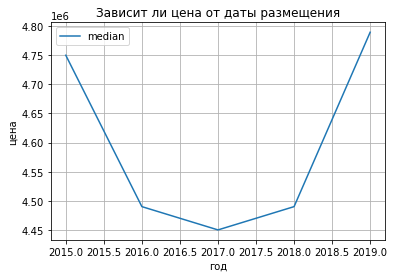

In [167]:
 # год
years_total_area_pivot_table = data.pivot_table(index='year_publication_advertisement', values='last_price', aggfunc=['mean', 'median', 'count'])
years_total_area_pivot_table.columns = ['mean', 'median', 'count']

years_total_area_pivot_table.sort_values(by='median', ascending=False)
years_total_area_pivot_table.plot(y='median', grid=True)
plt.title('Зависит ли цена от даты размещения')
plt.xlabel('год')
plt.ylabel('цена')


display(years_total_area_pivot_table)

 - Спад после 2015 года зависит скорей всего из-за санкций, ослабления рубля и ряда экономических факторов, которые могли повлиять на рынок недвижимости. После 2018 года начинается постепенный рост. 

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**Среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [168]:
average_price_one_sqr_locations_pivot_tab = data.pivot_table(index='locality_name_replace', values='price_one_sqr_meter', aggfunc=['count', 'mean'])
average_price_one_sqr_locations_pivot_tab.columns=['count', 'mean']
display(average_price_one_sqr_locations_pivot_tab.sort_values(by='count', ascending=False).head(10))

# высокая стоимость
display(average_price_one_sqr_locations_pivot_tab[average_price_one_sqr_locations_pivot_tab['mean'] == \
                                                  average_price_one_sqr_locations_pivot_tab
                                                  .sort_values(by='count', ascending=False).head(10)['mean'].max()])
# низкая стоимость
display(average_price_one_sqr_locations_pivot_tab[average_price_one_sqr_locations_pivot_tab['mean'] == \
                                                  average_price_one_sqr_locations_pivot_tab
                                                  .sort_values(by='count', ascending=False).head(10)['mean'].min()])



,count,mean
locality_name_replace,,
санкт-петербург,12417,111591.479445
поселок мурино,517,85983.765190
поселок шушары,385,77938.483694
всеволожск,308,68605.620450
колпино,293,74779.509490
поселок парголово,287,89186.224782
пушкин,278,101894.611356
деревня кудрово,266,92656.981467
гатчина,244,68065.179716


,count,mean
locality_name_replace,,
санкт-петербург,12417,111591.479445


,count,mean
locality_name_replace,,
выборг,193,57011.26406


 - Самая высокая стоимость квадратного метра из 10 населенных пунктов в Санкт-Петербурге, а самая низкая Гатчине.

<div class="alert alert-danger">
<b>😔 Необходимо исправить V2:</b> Самая низкая стоимость в Выборге
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
Самая высокая стоимость квадратного метра из 10 населенных пунктов в Санкт-Петербурге, а самая низкая Выборге.</div>


Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра

In [169]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,locality_name_replace,price_one_sqr_meter,day_week_publication_advertisement,month_publication_advertisement,year_publication_advertisement,floor_type_category,city_centers_nearest_km
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,NaN,81.0,поселок шушары,82920.792079,1,12,2018,первый,18.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.63,9,False,...,3.0,234.0,424.0,санкт-петербург,408176.100629,4,7,2015,другой,6.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121.0,санкт-петербург,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,55.0,поселок янино-1,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,NaN,155.0,поселок парголово,99195.710456,3,11,2017,другой,19.0


,price_one_sqr_meter
city_centers_nearest_km,
0.0,166471.837449
1.0,162093.574510
2.0,142635.834325
3.0,126166.741481
4.0,135404.499120
5.0,142446.992959
6.0,141407.981058
7.0,140621.964978
8.0,118060.845072


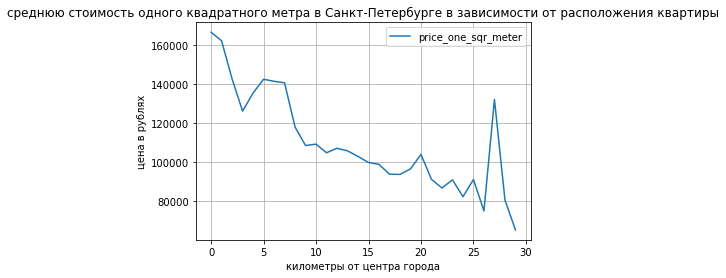

In [170]:
spb_average_cost_center_km = data[data['locality_name_replace'] == 'санкт-петербург'].pivot_table(
    index='city_centers_nearest_km',
    values='price_one_sqr_meter',
    aggfunc='mean'
)


display(spb_average_cost_center_km)

spb_average_cost_center_km.plot(grid=True)

plt.title('среднюю стоимость одного квадратного метра в Санкт-Петербурге в зависимости от расположения квартиры')
plt.xlabel('километры от центра города')
plt.ylabel('цена в рублях')
plt.show()

plt.show()

 - Между удаленностью от центра и ценой за квадратный метр недвижимости есть взаимосвязь. Чем дальше от центра, тем дешевле стоимость.
 - Центр заканчивается примерно на 7 км, так как наблюдается резкий спад цены.

<div class="alert alert-danger">
<b>😔 Необходимо исправить V2:</b> Какие есть особености на графике?
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> 
    Наблюдается обратная зависимость цены от увеличения расстояния от центра города.
</div>


### Напишите общий вывод

1. **Были поставлены задачи**
       1.Откройте файл с данными и изучите общую информацию.
       2.Предобработка данных, скорректировать типы данных, избавиться от дубликатов и аномальных данных.
       3.Добавьте в таблицу новые столбцы с категориями.
       4.Проведите исследовательский анализ данных.
     
    
    
2. **Обнаружены и исправлены**
    
        1.Высота потолков, этажи домов, количество комнат, цены на квартиры. Скорей всего возникли по причине                 пользователя при заполнении данных.
    
        2.В названиях населенных пунктов использовалось много синонимов одних и тех же названий локаций 
          ("поселок" и "поселок городского типа" или "городской поселок"), так же возникли по причине
          пользователя, который заполнял данные.
    
        3.Были добавлены новые столбцы категоризации:
    
            -  день публикации объявления(0-Пн, 1-Вт, 2-Ср, 3-Чт, 4-Пт, 5-Сб, 6-Вс)
            -  месяц публикации объявления
            -  год публикации объявления
            -  цена одного квадратного метра
            -  тип этажа квартир
            -  расстояния в км до центра города
    
    При помощи этих столбцов проанализируем формирование стоимости квартиры.
    
    
    
3. **Определили параметры**
       
      - медианная площадь кухни:  9 кв.м.
      - большинство квартир: 1 - 2 комнатные
      - средняя высота потолков: 2.7 м.
      - средняя стоимость квартир: 4.5 млн.руб.
      - площадь квартир не привышает: 58 кв.м.
      - в основном этажность домов: 5 и 9 этажные
      - большая часть квартир распологается не выше 5 этажа
  
  
  
4. **Скорость продаж квартир**

      - Средняя длительность продажи составляет 44 день
      - Пики продаж составили 45, 60 и 90 дней.
      
   Если квартира хорошая и соответствует определенным критериям, то она имеет большой шанс быть проданной.
   
   
   
5. **Факторы, которые больше всего влияют на общую стоимость жилья**

      - Общая площадь влияет на стоимость квартиры.
      - На стоимость квартиры влияет общая жилая площадь и площадь кухни.
      - Зависимости между этажом и стоимостью прямой нет. Отметим тоько, что квартирв в промежутке со 2-го и предпоследнего этажа стоят дороже, чем на первом и последнем этаже. 
      
      
      
6. **Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**
          
    - санкт-петербург	     :	**111591.4**
    - поселок мурино	     :	**85983.7**
    - поселок шушары	     :	**77938.4**
    - всеволожск	         :	**68605.6**
    - колпино	             :	**74779.5**
    - поселок парголово	     :	**89186.2**
    - пушкин	             :	**101894.6**
    - деревня кудрово        :	**92656.9**
    - гатчина	             :	**68065.1**
    - выборг	             :	**57011.2**
    
   Самая высокая стоимость квадратного метра из 10 населенных пунктов в Санкт-Петербурге, а самая низкая Выборге.

    
     
     
     
7. **Влияет расстояние до центра города В Санкт-Петербурге на стоимость**
   Изучив данные о расстоянии до центра города определил, что наиболее дорогие квартиры находятся на расстоянии до 7 км от центра, а за пределами 7 км цена на квартиры падает. Наблюдается обратная зависимость цены от увеличения расстояния от центра города.
     

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.